In this file we will look at the output of finding the rates of different binaries after having run the slurm job (on the loss mass COMPAS output)

I will look at both executes of rates of all DCOS+WD and just WD

In [1]:
# all of the necessary imports
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [29]:
# reading in the HDF5 file
pathTorates_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/Rate_info_NS.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates_H5)

In [30]:
list(Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned'].keys())
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [31]:
rates_info.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [32]:
display(rates_info['SEED'])
display(rates_info['DCOmask'])
print(sum(rates_info['DCOmask'][()])) # this is summing the trues that are BNS that merged within a hubble time (same as number of SEEDs in this rate info H5 file)
display(rates_info['merger_rate']) #80 redshift bins 
display(rates_info['redshifts'])
print(rates_info['redshifts'][()])

<HDF5 dataset "SEED": shape (19,), type "<u8">

<HDF5 dataset "DCOmask": shape (360,), type "|b1">

19


<HDF5 dataset "merger_rate": shape (19, 80), type "<f8">

<HDF5 dataset "redshifts": shape (80,), type "<f8">

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9]


In [33]:
# reading in the HDF5 file
pathToSM_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_LowMass_1.h5' #path of the hdf5 file

Data_2 = h5.File(pathToSM_H5)

In [34]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_data = pd.DataFrame() # making a pandas dataframe

for key in Data_2["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_data[key] = Data_2["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [35]:
dco_mask = rates_info['DCOmask'][()]
merging_NSNS = DCO_data[dco_mask]

In [36]:
print(np.shape(rates_info['merger_rate'][:,0]))

(19,)


In [37]:
merging_NSNS['merger_rate_z0'] = rates_info['merger_rate'][:,0]

/tmp/ipykernel_801012/4163823339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_NSNS['merger_rate_z0'] = rates_info['merger_rate'][:,0]


In [38]:
merging_NSNS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),merger_rate_z0
15,1,4.748315,0.623930,0,b'2 ',b'4-8 ',1.260126,1.322620,1,0.000323,...,418855,0.004341,13,13,33.649443,0.000126,-1.694017,0.0,0.0,0.000855
23,1,3.162000,0.418140,0,b'2 ',b'4-8 ',1.260180,1.277584,1,0.000511,...,438875,0.002976,13,13,35.372554,0.000180,-1.657328,0.0,0.0,0.004354
29,1,34.065425,0.189972,0,b'4-8 ',b'8 ',1.277719,1.277584,1,0.001198,...,651313,0.004731,13,13,40.497868,0.000135,-1.335271,0.0,0.0,0.057433
60,1,31.483034,0.163235,0,b'5 ',b'8 ',1.277732,1.277584,1,0.004774,...,451628,0.004599,13,13,29.821243,0.000149,-1.317773,0.0,0.0,1.155829
75,1,85.827476,0.459599,0,b'4-8 ',b'8 ',1.277633,1.277584,1,0.000840,...,761020,0.007103,13,13,40.301712,0.000049,-1.432305,0.0,0.0,0.020778
86,1,1563.689829,0.437393,0,b'5 ',b'8 ',1.668267,1.493917,1,0.007143,...,738621,0.016834,13,13,16.502195,0.000020,-1.385497,0.0,0.0,2.550545
153,1,2658.001673,0.583687,0,b'5 ',b'8 ',1.775825,1.613424,1,0.012691,...,519339,0.024207,13,13,14.905412,0.000018,-1.393037,0.0,0.0,5.226306
174,1,2.456000,0.571036,0,b'2-8 ',b'4-8 ',1.260127,1.373905,1,0.000221,...,130780,0.003428,13,13,37.736467,0.000127,-1.747179,0.0,0.0,0.000197
191,1,50.351583,0.156808,0,b'2 ',b'4-8 ',1.260129,1.277584,1,0.006075,...,197130,0.005136,13,13,41.552101,0.000129,-1.262143,0.0,0.0,1.675444
192,1,288.911579,0.511055,0,b'2 ',b'4-8 ',1.260030,1.349386,1,0.016219,...,198500,0.010346,13,13,29.946002,0.000030,-1.355765,0.0,0.0,4.595955


In [39]:
# this is the rate at redhsif zero (check expectations with Ligo paper 2023 - see on their website)
print(sum(merging_NSNS['merger_rate_z0']))

34.758742306206145


Text(0, 0.5, 'dR/dM')

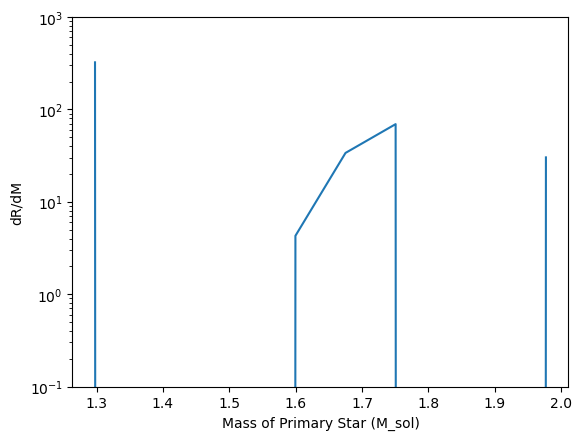

In [45]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_NSNS['Mass(1)'], weights=merging_NSNS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_NSNS['Mass(1)'], weights=merging_NSNS['merger_rate_z0'])
plt.xlabel("Mass of Primary Star (M_sol)")
plt.yscale('log')
plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM")

#### Doing rates analysis on the h5 file that includes WD in DCO

In [2]:
# reading in the HDF5 file
pathTorates_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/Rate_info_WD.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates_H5)

In [3]:
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [4]:
rates_info.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [5]:
# reading in the HDF5 file
pathToweights_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_wWeights_SM_2.h5' #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5)

In [6]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_DCO_WD"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_WD_data[key] = Data_weights["BSE_DCO_WD"][key][()] # adding these columns to the dataframe

In [7]:
# gathering the seeds from the rates.h5 file
dco_mask = rates_info['DCOmask'][()]
merging_all_WD = DCO_WD_data[dco_mask]

In [8]:
print(np.shape(rates_info['merger_rate'][:,0]))

(63,)


In [10]:
# making a new column in the DCO_WD dataset that includes the merger rates at redhsift zero for each system
merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]

/tmp/ipykernel_1969131/2127216249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]


In [12]:
merging_all_WD

,CE_Event_Counter,CE_Event_Counter_new,Coalescence_Time,Coalescence_Time_new,Eccentricity@DCO,Eccentricity@DCO_new,Immediate_RLOF>CE,Immediate_RLOF>CE_new,MT_Donor_Hist(1),MT_Donor_Hist(1)_new,...,SemiMajorAxis@DCO_new,Stellar_Type(1),Stellar_Type(1)_new,Stellar_Type(2),Stellar_Type(2)_new,Time,Time_new,mixture_weight,mixture_weight_new,merger_rate_z0
10,0,0,5245.300066,5245.300066,2.482534e-16,2.482534e-16,0,0,"b""b'2 '""","b""b'2 '""",...,0.111030,14,14,14,14,7.550156,7.550156,10.000000,10.000000,10.123063
11,1,1,540.666835,540.666835,1.110223e-16,1.110223e-16,0,0,"b""b'2 '""","b""b'2 '""",...,0.054400,14,14,14,14,7.513924,7.513924,10.000000,10.000000,11.022327
27,0,0,1463.362046,1463.362046,3.723801e-16,3.723801e-16,0,0,"b""b'1-2 '""","b""b'1-2 '""",...,0.075614,14,14,14,14,6.760226,6.760226,10.000000,10.000000,45.805602
39,1,1,0.032784,0.032784,9.494938e-01,9.494938e-01,0,0,"b""b'2 '""","b""b'2 '""",...,0.017519,14,14,13,13,9.515232,9.515232,10.000000,10.000000,22.546380
41,1,1,7.808297,7.808297,2.775558e-17,2.775558e-17,0,0,"b""b'2 '""","b""b'2 '""",...,0.017661,14,14,14,14,8.433063,8.433063,10.000000,10.000000,0.224812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0,0,4783.803877,4783.803877,2.288783e-16,2.288783e-16,0,0,"b""b'1-2 '""","b""b'1-2 '""",...,0.128452,14,14,14,14,6.750130,6.750130,10.000000,10.000000,10.109978
492,1,1,1540.943256,1540.943256,9.272396e-01,9.272396e-01,0,0,"b""b'2 '""","b""b'2 '""",...,0.061545,13,13,13,13,58.235508,58.235508,0.315149,0.315149,0.002317
495,1,1,52.320055,52.320055,1.560227e-01,1.560227e-01,0,0,"b""b'2 '""","b""b'2 '""",...,0.005101,13,13,13,13,42.525732,42.525732,2.610643,2.610643,0.000578
497,1,1,6076.656067,6076.656067,4.515486e-01,4.515486e-01,0,0,"b""b'2 '""","b""b'2 '""",...,0.019758,13,13,13,13,48.745117,48.745117,0.590270,0.590270,0.016169


Text(0, 0.5, 'dR/dM (natural log)')

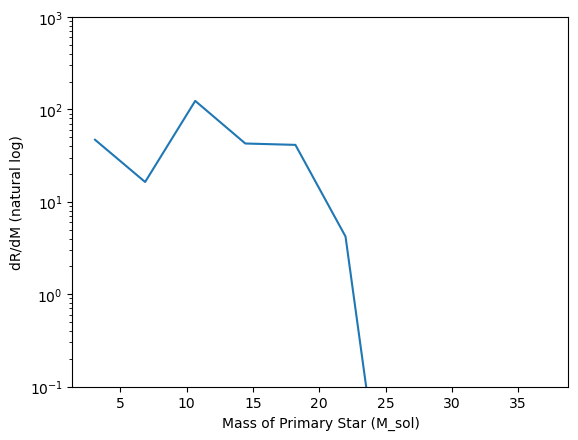

In [14]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel("Mass of Primary Star (M_sol)")
plt.yscale('log')
plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")